In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

#dataset loaded and divided into training and testing

X_train.shape

#here we 50k data in training set, with 32x32 size and 3 color channels


170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
y_train[:5]    #as we can see its in 2d, and we just need the number, so we will reshape this

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [26]:
y_train = y_train.reshape(-1,)  

#lost one dimension, 2d became 1d
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [27]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

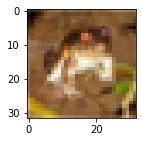

In [28]:
#above is just in numbers and 3 color channel image matrix, But i need to visualise it.

plt.figure(figsize=(15,2))   #setting a display size
plt.imshow(X_train[0])

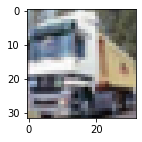

In [29]:
plt.figure(figsize=(15,2))

plt.imshow(X_train[1])

In [30]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [31]:
#now for convenience I am going to define a function

def plot_sample(X, y, index):
  plt.figure(figsize= (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])     #I need to print the lable also. But as on the site, we have numbers as labels.


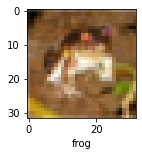

In [32]:
plot_sample(X_train, y_train, 0)

#works perfectly, gives the correct label

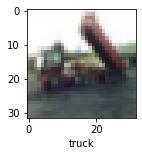

In [33]:
plot_sample(X_train, y_train, 2)

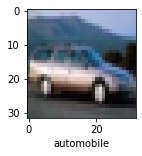

In [34]:
plot_sample(X_train, y_train, 4)

In [35]:
#now we need to normalise it

X_train = X_train / 255
X_test = X_test / 255

In [37]:
#using ANN (multilayer perceptron) to do the task

ann = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000, activation='relu'),
                         layers.Dense(1000,activation = 'relu'),
                         layers.Dense(10, activation= 'sigmoid')
                         ])

ann.compile(optimizer='SGD', 
            loss='sparse_categorical_crossentropy',   #sparse is used as we know the final output in terms of integers. If it was one-hot encode, then we use categorical cross entropy
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.8107 - accuracy: 0.3525
Epoch 2/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.6207 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5393 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.4798 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4292 - accuracy: 0.4964


In [38]:
#as we can see ann didnt do a good job, accuracy is not even 50. Pretty bad. And this was just training data

#now evaluating it with testing data and the accuracy drops to 45%

ann.evaluate(X_test, y_test)

313/313 [==============================] - 9s 27ms/step - loss: 1.5564 - accuracy: 0.4501


[1.5563905239105225, 0.45010000467300415]

In [39]:
#classification report 

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.37      0.74      0.50      1000
           1       0.40      0.79      0.53      1000
           2       0.43      0.23      0.30      1000
           3       0.42      0.25      0.32      1000
           4       0.40      0.48      0.43      1000
           5       0.51      0.20      0.29      1000
           6       0.58      0.42      0.48      1000
           7       0.52      0.55      0.54      1000
           8       0.66      0.33      0.44      1000
           9       0.49      0.51      0.50      1000

    accuracy                           0.45     10000
   macro avg       0.48      0.45      0.43     10000
weighted avg       0.48      0.45      0.43     10000



In [ ]:
#Out of total, how many of predictions did I get right -> accuracy

#Precision is out all predictions, how many you got right. Precision =  TP/ (TP+FP)

#Recall is out of all truth, how many you got right. Recall = TP/(TP+FN)



#For precision, thnk about predictions as your base.
#For recall, think about truth as your base.
#f1 is just a harmonic mean of precision and recall
